In [ ]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re


### Detailed Objective :

1. **Racer Performance Analysis**:
   - **Assess Points and Positions**: Evaluate the performance of individual racers across different seasons by analyzing their total points, race positions, and consistency. This involves identifying trends in points accumulation and how consistently drivers place in the top positions.
   - **Identify Patterns and Trends**: Investigate how racer performance evolves over the years, noting any significant patterns such as consistent top finishes, performance in specific race conditions, or performance improvements/declines.
   - **Consistency Evaluation**: Focus on the consistency of racers in terms of race finishes, highlighting those who maintain competitive positions over multiple seasons, and comparing their performance in relation to the race results.

2. **Team Performance Analysis**:
   - **Team Wins and Points Accumulation**: Analyze how teams perform in terms of total wins, points, and overall standings across seasons. This includes evaluating how well teams contribute to constructors' championships and assess the overall competitiveness of teams.
   - **Performance Trends**: Study team performance over the years, examining whether certain teams have a sustained advantage or if new teams are emerging as contenders. Identify trends in wins, podium finishes, and overall points.
   - **Individual Driver Contribution**: Assess the impact of individual drivers on their respective teams, especially those who contribute significantly to team victories. Analyze how driver performance correlates with team success and discuss the importance of teamwork in achieving constructors' championships.

3. **Grand Prix Locations and Race Dynamics**:
   - **Race Performance Based on Grand Prix Locations**: Analyze how individual racers perform at different Grand Prix locations and race tracks. This could involve looking at whether certain drivers or teams consistently perform better on specific circuits and identifying any trends tied to track characteristics.
   - **Event Evolution and Schedules**: Study the changes in the Formula 1 calendar over the years, including the number of races, race locations, and how the scheduling of events impacts team and driver performance.
   - **Race Organization Across Locations**: Provide insights into the organization and frequency of races at various Grand Prix locations. Discuss the role of event planning, circuit type, and logistical challenges in shaping race outcomes.

### Conclusion:
The project aims to provide an in-depth analysis of the dynamic relationships between racers, teams, and race locations. By examining historical performance data and extracting key insights, it will help in understanding long-term trends and provide strategic recommendations for improving performance, both for drivers and teams. Additionally, it will highlight the role of race scheduling and location selection in shaping the competitive landscape of Formula 1.

This analysis could be highly valuable for teams, drivers, analysts, and fans looking to understand the nuances of race performance and the factors contributing to success in Formula 1.

# Web Scraping and Data Collection for Analysis

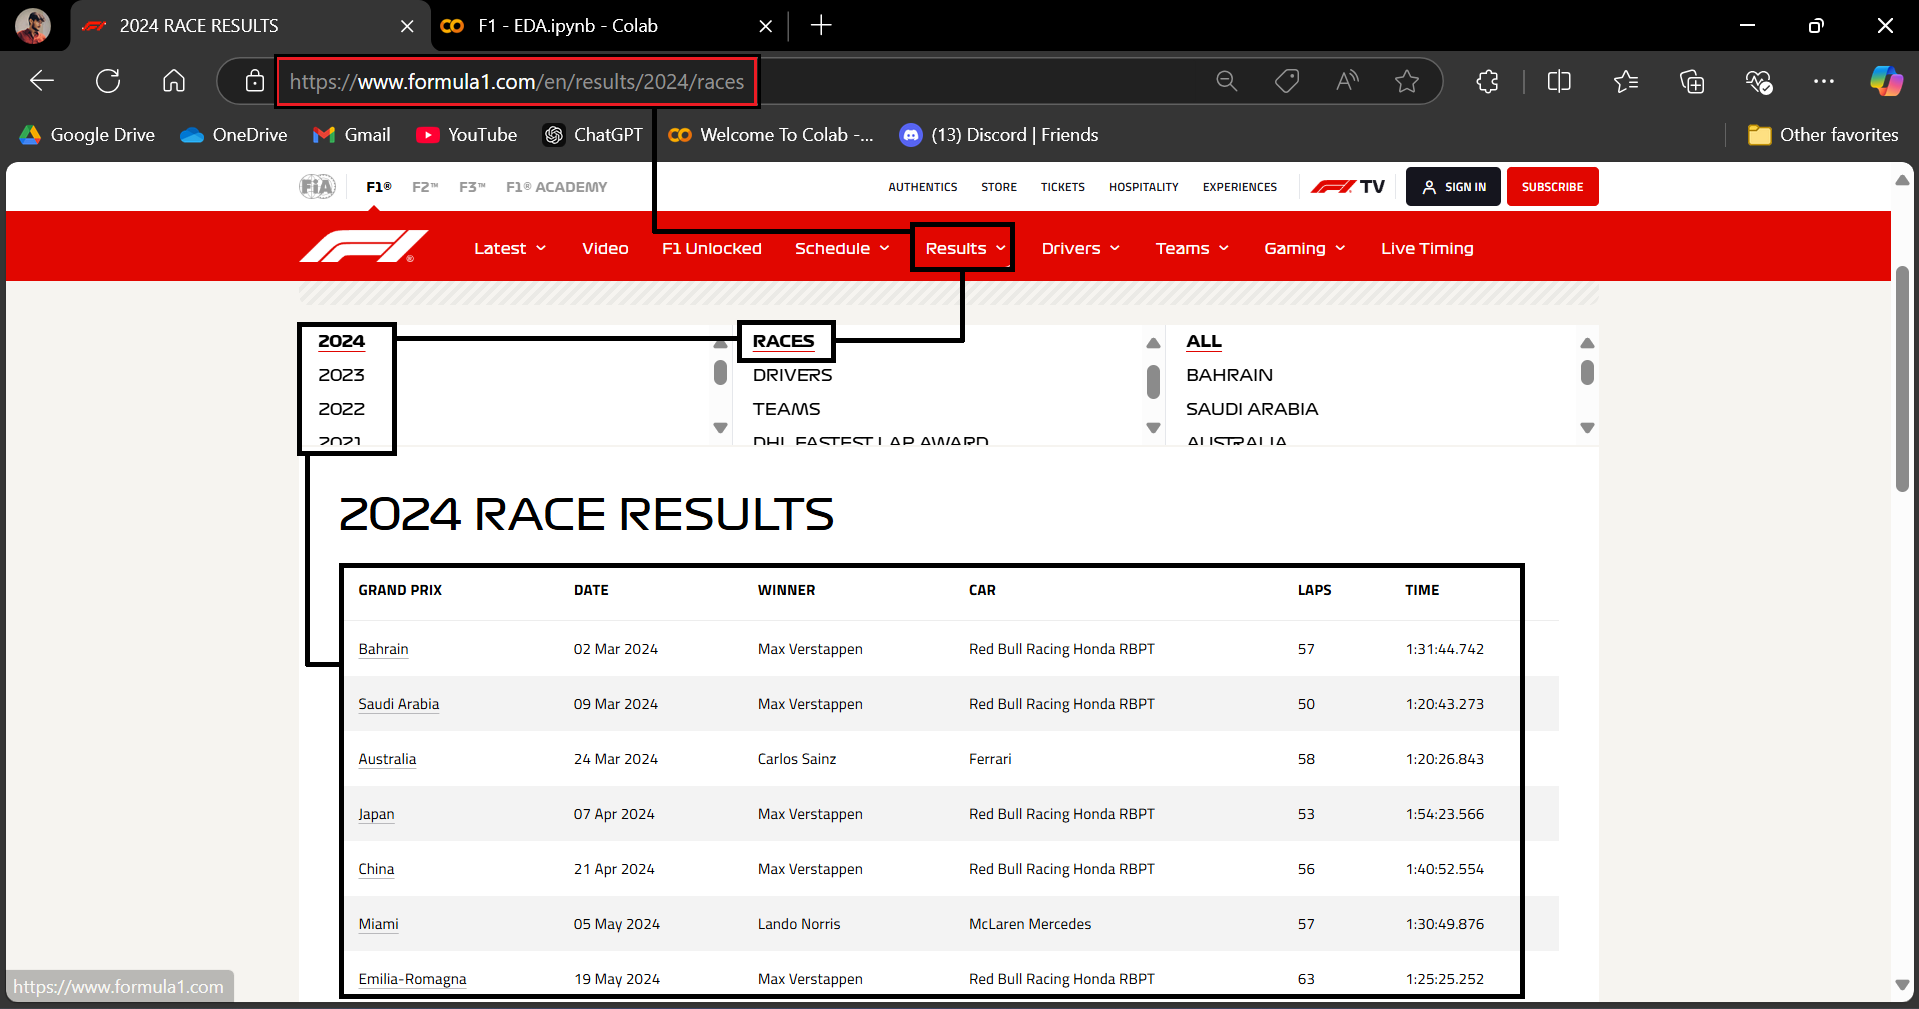

In [ ]:
Country = [] # List to store the names of countries

Winner = [] # List to store the names of winners

Date = [] # List to store the dates of the events

Laps = [] # List to store the number of laps in each race

Winners_Car = [] # List to store the names or models of the winners' cars

Time_taken_to_Complete = []  # List to store the time taken to complete each race

# Define a range of years from 2000 to 2024 (inclusive)
Year_sequence = range(1994, 2024 + 1)  # The range function generates numbers from 2000 to 2024, inclusive


for Year in Year_sequence:  # Loop through years 2000 to 2024
    URL = f"https://www.formula1.com/en/results/{Year}/races"  # Construct the URL for each year
    page = requests.get(URL)  # Send a request to get the webpage content
    soup = BeautifulSoup(page.text)  # Parse the webpage content with BeautifulSoup

    # Extracting country names
    for i in soup.find_all('a', class_='underline underline-offset-normal decoration-1 decoration-greyLight hover:decoration-brand-primary'):
        Country.append(i.text)

    # Extracting winner names
    list_of_data = []
    for i in soup.find_all('td', class_='p-normal whitespace-nowrap'):
        list_of_data.append(i.text)
    Uncleaned_Winner_Names = list_of_data[1::3]
    Winner = Winner + [re.sub(r'\xa0', ' ', name)[:-3] for name in Uncleaned_Winner_Names]

    # Extracting race dates
    for i in soup.find_all('td', class_='p-normal default:max-mobile:collapse default:max-mobile:max-w-0 default:max-mobile:hidden mobile:max-tablet:collapse mobile:max-tablet:max-w-0 mobile:max-tablet:hidden whitespace-nowrap'):
        text = i.text
        date_match = re.findall(r"(\d{2}\s*\w{3}\s*\d{4})", text)  # Extracting date using regex
        if date_match:
            Date.append(text)

    # Extracting number of laps
    for i in soup.find_all('td', class_='p-normal default:max-mobile:collapse default:max-mobile:max-w-0 default:max-mobile:hidden mobile:max-tablet:collapse mobile:max-tablet:max-w-0 mobile:max-tablet:hidden whitespace-nowrap'):
        text = i.text
        laps_match = re.fullmatch(r"(\d*)", text)  # Extracting laps using regex
        if laps_match:
            Laps.append(text)

    win_cars_to_add = []  # List to hold car names

    # Extracting car names
    for i in soup.find_all('td', class_='p-normal whitespace-nowrap'):
        win_cars_to_add.append(i.text)  # Appending car names to the list

    Winners_Car = Winners_Car + win_cars_to_add[2::3]  # Adding car names to the Winners_Car list at intervals of 3

    # Extracting time taken to complete the race
    for i in soup.find_all('p', class_='f1-text font-titillium tracking-normal font-normal non-italic normal-case leading-none f1-text__micro text-fs-15px'):
        text = i.text.strip()  # Clean up the text
        time_match = re.fullmatch(r"(\d{1,2}:\d{2}:\d{2}\.\d{3}|\d{1,2}:\d{2}\.\d{3})", text)  # Extracting time with regex
        if time_match:
            Time_taken_to_Complete.append(text)

# Creating a DataFrame from the extracted lists
f1_Race_Results = pd.DataFrame({
    "Race Location by Country": Country,
    "Winner": Winner,
    "Date": Date,
    'Laps': Laps,
    'Winner TEAM': Winners_Car,
    'Race Duration': Time_taken_to_Complete
})

1. **URL Handling**:  
   A loop dynamically generates URLs for each year (1994–2024) by substituting the year into a consistent URL pattern. This eliminates manual URL creation, allowing the program to fetch and parse web pages for each year's race results automatically.

2. **Data Extraction**:  
   Specific HTML elements and classes are targeted using BeautifulSoup to extract relevant data like countries, winners, dates, laps, winning cars, and race durations. The extracted data is cleaned and stored in separate lists, ensuring each piece of information is well-organized.

3. **DataFrame Creation**:  
   Once all data is collected in lists, a pandas DataFrame is constructed with labeled columns. This tabular format makes the data ready for further analysis or visualization, streamlining the workflow from raw web content to structured data.

In [ ]:
def format_race_duration(duration):
    parts = duration.split(":")
    if len(parts) == 2:  # If format is mm:ss.sss
        duration = f"00:{parts[0].zfill(2)}:{parts[1]}"  # Add hours and ensure minutes are 2 digits
    elif len(parts) == 3:  # If format is hh:mm:ss.sss
        duration = f"{parts[0].zfill(2)}:{parts[1].zfill(2)}:{parts[2]}"  # Ensure hours and minutes are 2 digits
    return duration

# Apply function to the Race Duration column
f1_Race_Results['Race Duration'] = f1_Race_Results['Race Duration'].apply(format_race_duration)

f1_Race_Results['Race Duration'] = pd.to_timedelta(f1_Race_Results['Race Duration'])
f1_Race_Results['Laps'] = f1_Race_Results['Laps'].astype(int)

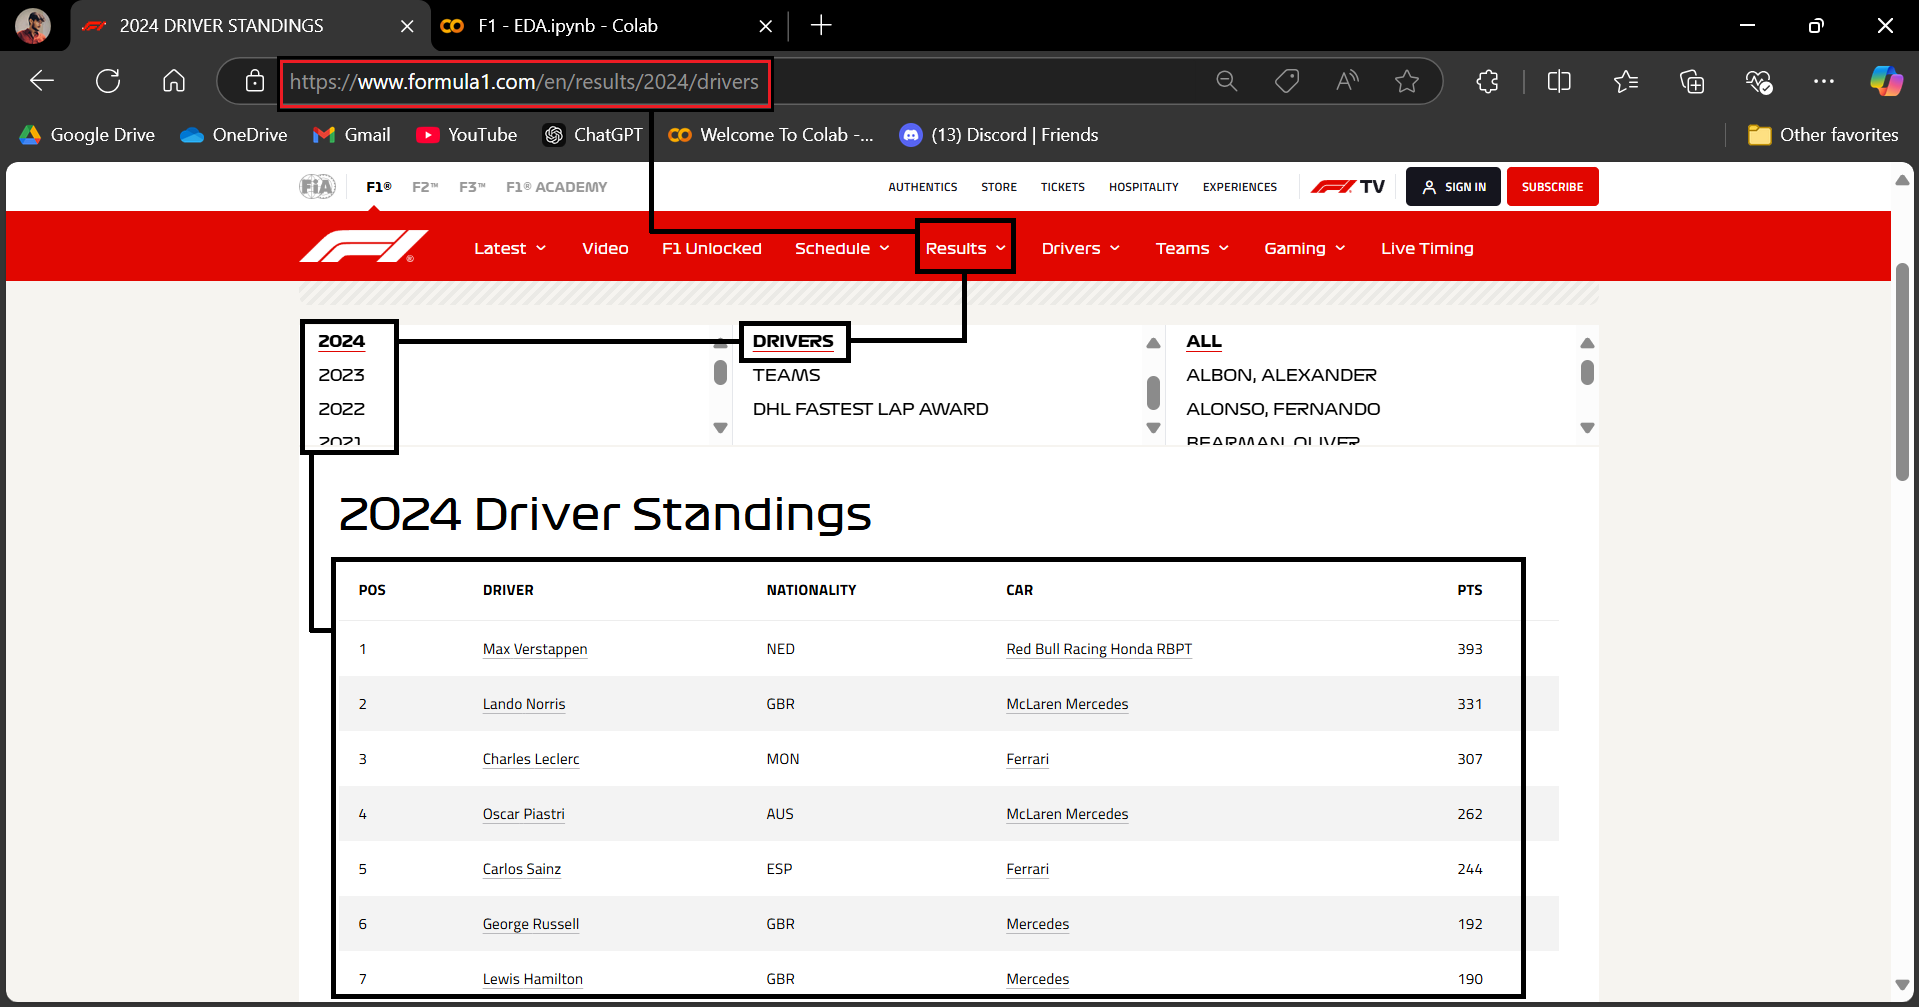

In [ ]:
# Initialize empty lists to store driver names, nationalities, and year of race
POS = []
Driver = []  # List to store the names of drivers
Nationality = []  # List to store the nationalities of the drivers
Year_of_Race = []  # List to store the years of the races
PTS = []
TEAM = []
# Loop through years 2000 to 2024
for Year in Year_sequence:  # Loop through the list of years in Year_sequence
    # Construct the URL for each year (Formula 1 website URL for driver results)
    URL = f"https://www.formula1.com/en/results/{Year}/drivers"
    # Send a request to get the webpage content
    page = requests.get(URL)
    # Parse the webpage content with BeautifulSoup
    soup = BeautifulSoup(page.text, 'html.parser')


    # Extracting driver names
    list_of_data = []
    for i in soup.find_all('td', class_='p-normal whitespace-nowrap'):
        list_of_data.append(i.text)  # Append the driver’s name to the Driver list
    POS = POS + list_of_data[::5]
    Uncleaned_Driver_Names = list_of_data[1::5]
    TEAM = TEAM + list_of_data[3::5]
    Driver = Driver + [re.sub(r'\xa0', ' ', name)[:-3] for name in Uncleaned_Driver_Names]

    for i in soup.find_all('a', class_='underline underline-offset-normal decoration-1 decoration-greyLight hover:decoration-brand-primary'):
        list_of_data.append(i.text)
    # Extracting nationality information
    for i in soup.find_all('p', class_='f1-text font-titillium tracking-normal font-normal non-italic normal-case leading-none f1-text__micro text-fs-15px'):
        text = i.text  # Extract text from the element
        # Use regular expression to check if the text matches a 3-letter nationality code (e.g., 'GBR', 'GER')
        Nationality_match = re.fullmatch(r"([A-Z]{3})", text)
        if Nationality_match:
            Nationality.append(text)  # If a valid nationality is found, append it to the Nationality list
            Year_of_Race.append(Year)  # Append the year of the race to the Year_of_Race list
    List_of_data = []
    # Extracting PTS of Racers
    for i in soup.find_all('p',class_='f1-text font-titillium tracking-normal font-normal non-italic normal-case leading-none f1-text__micro text-fs-15px'):
      List_of_data.append(i.text)
    PTS = PTS + List_of_data[4::5]

# Create a DataFrame with the collected driver names, nationalities, and years of the race
f1_Driver_Standings = pd.DataFrame({
    'POS' : POS,
    "TEAM": TEAM,
    'Driver': Driver,            # Driver names list
    'Nationality': Nationality,  # Nationality list
    'Year of Race': Year_of_Race, # Year of the race list
    'PTS':PTS
})

1. **URL Handlling**:  
   The loop dynamically generates URLs for each year between 1994 and 2024, as this specific range is crucial for your analysis. By collecting data from these years, you ensure the dataset includes all relevant race results and driver performances, allowing for a comprehensive analysis over the span of multiple decades in Formula 1.

2. **Data Extraction for Analysis**:  
   Extracting race data from this time period allows you to capture trends, changes, and patterns in driver standings, nationalities, and team performances over time. The range of years enables the analysis of driver progress, team dominance, and national representations, all essential factors for a detailed historical perspective.

3. **DataFrame Construction for Analysis**:  
   With the data extracted for each year, a DataFrame is constructed that contains columns such as 'POS', 'Driver', 'TEAM', 'Nationality', 'Year of Race', and 'PTS'. This structured data format, with year-based granularity, ensures the analysis can track year-by-year changes in driver performance, nationality distribution, and team standings, making the insights more valuable and actionable.

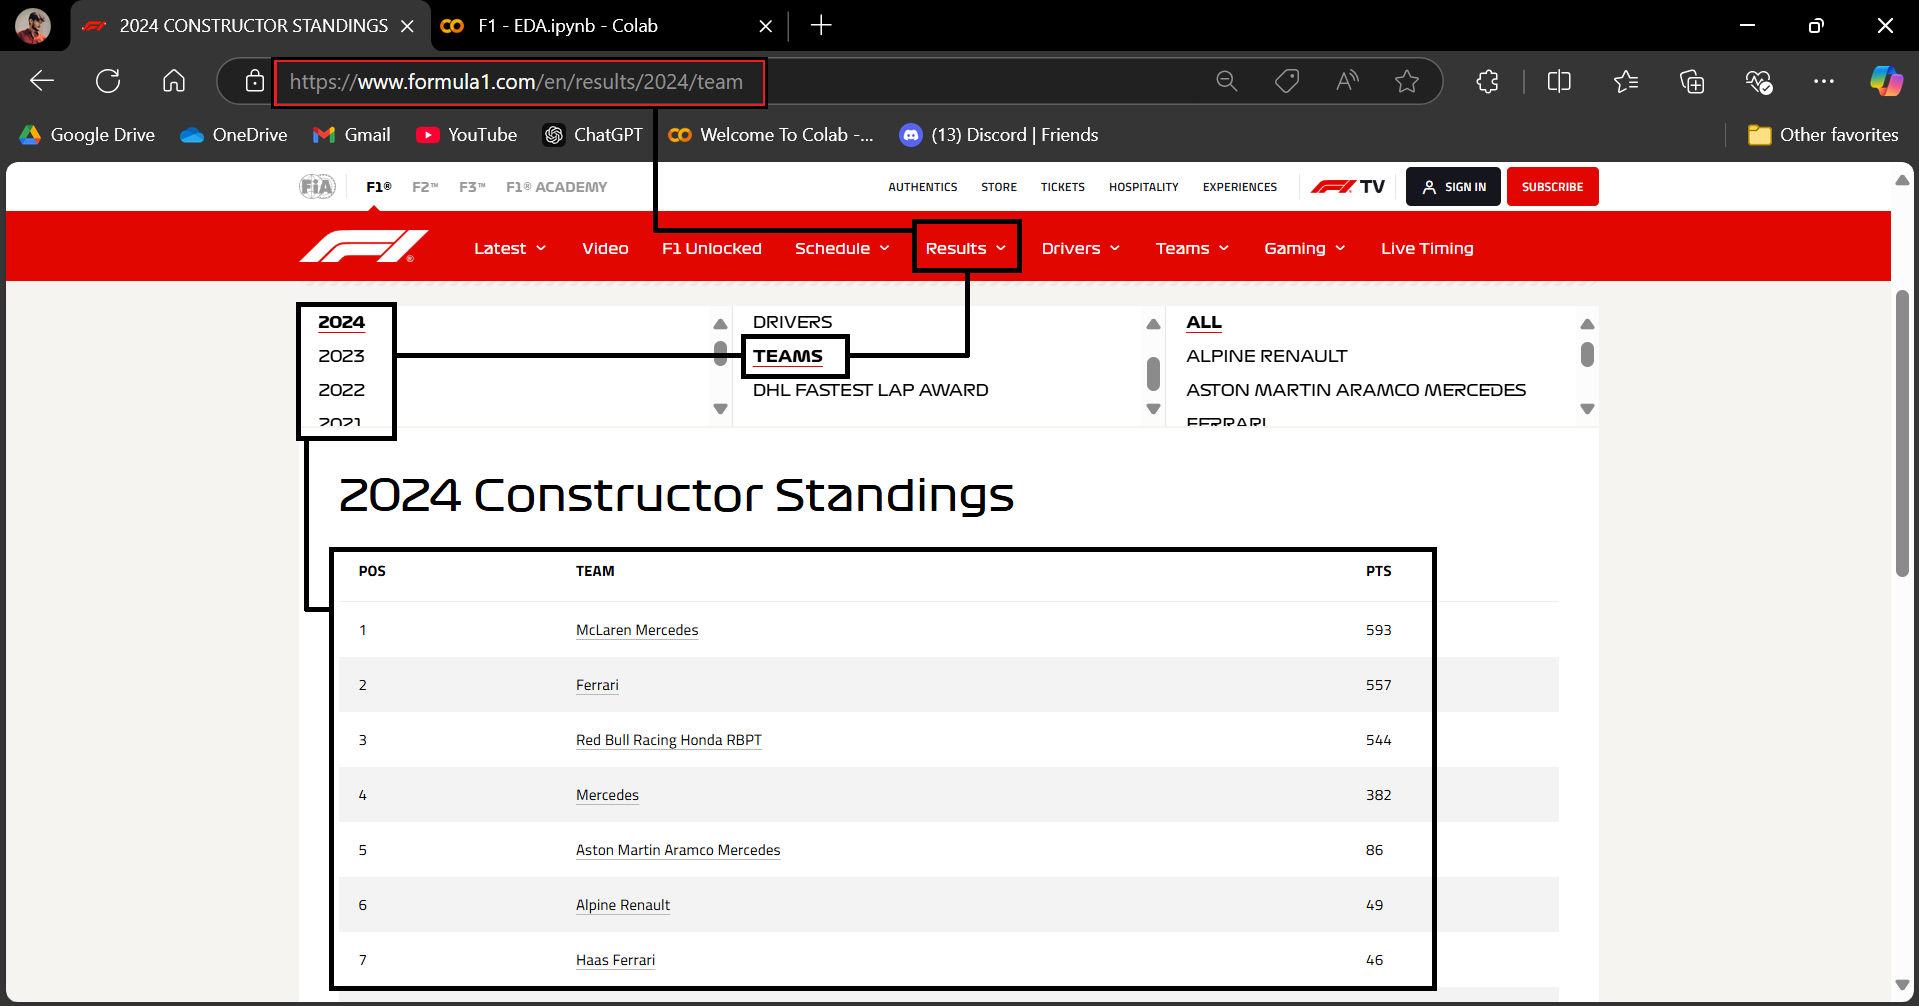

In [ ]:
POS  = []
Team = []
PTS  = []
Year = []
for Y in Year_sequence:
  URL = f"https://www.formula1.com/en/results/{Y}/team"
  page = requests.get(URL)
  soup = BeautifulSoup(page.text, 'html.parser')
  Temp_data =[]
  Ye = [ Y ]
  for i in soup.find_all('td', class_='p-normal whitespace-nowrap'):
    Temp_data.append(i.text)

  POS = POS + Temp_data [::3]
  Team = Team + Temp_data [1::3]
  PTS = PTS + Temp_data [2::3]
  Year = Year + Ye * len(Temp_data [::3])

f1_Constructor_Standings = pd.DataFrame({
    'POS': POS,
    'TEAM': Team,
    'YEAR': Year,
    'PTS': PTS
})

1. **URL Handling for Specific Years (1994–2024)**:
   - The loop generates URLs for each year from 1994 to 2024 by embedding the year in the URL format: `https://www.formula1.com/en/results/{Y}/team`. This allows the script to access the relevant data for each year’s team standings.
   - By using this year-specific URL structure, the data extraction becomes systematic, ensuring that the data from all years (1994–2024) is captured.

2. **Extracting Relevant Data for Analysis**:
   - Each year's URL corresponds to the constructor standings page, where the script extracts positions (POS), team names (Team), and points (PTS) for each team in the championship standings.
   - By iterating over the years, all the necessary data points are collected for a comprehensive analysis of the performance of different teams across the years.

3. **Creating a DataFrame for Better Analysis**:
   - The extracted data (POS, Team, PTS, Year) is stored in lists, which are then used to create a structured pandas DataFrame.
   - Having data from all years (1994–2024) in a single DataFrame allows for better comparison and analysis, such as evaluating trends in team performance, points accumulation, and rankings over time.

# Data Cleaning and Data Preparation

In [ ]:
f1_Race_Results['Date'] = pd.to_datetime(f1_Race_Results['Date'], format='%d %b %Y', errors='coerce')

# Extract the (year & Month) and create a new column for it
f1_Race_Results['Year of Race'] = f1_Race_Results['Date'].dt.year
f1_Race_Results['Month of Race'] = f1_Race_Results['Date'].dt.month_name()

In [ ]:
f1_Driver_Standings = f1_Driver_Standings[f1_Driver_Standings['POS'] != 'DQ']

f1_Driver_Standings['POS'] = f1_Driver_Standings['POS'].astype(int)
f1_Driver_Standings['PTS'] = f1_Driver_Standings['PTS'].astype(float)

<ipython-input-7-548f6191c9d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1_Driver_Standings['POS'] = f1_Driver_Standings['POS'].astype(int)
<ipython-input-7-548f6191c9d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1_Driver_Standings['PTS'] = f1_Driver_Standings['PTS'].astype(float)


In [ ]:
f1_Constructor_Standings = f1_Constructor_Standings[f1_Constructor_Standings['POS'] != 'EX']

f1_Constructor_Standings['POS'] = f1_Constructor_Standings['POS'].astype(int)
f1_Constructor_Standings['PTS'] = f1_Constructor_Standings['PTS'].astype(float)

In [ ]:
f1_Race_Results = f1_Race_Results.merge(
    f1_Driver_Standings,
    left_on=['Winner', 'Year of Race'],
    right_on=['Driver', 'Year of Race'],
    how='left'
)

In [ ]:
f1_Race_Results["Winner Nationality"] = f1_Race_Results['Nationality']

f1_Race_Results = f1_Race_Results.drop(columns=['Driver'])
f1_Race_Results = f1_Race_Results.drop(columns=['Date'])
f1_Race_Results = f1_Race_Results.drop(columns=['PTS'])
f1_Race_Results = f1_Race_Results.drop(columns=['TEAM'])

In [ ]:
# Reorder columns to place 'Nationality' next to 'Winner'
f1_Race_Results = f1_Race_Results[['Race Location by Country', 'Winner', "Winner Nationality", 'Laps', 'Winner TEAM', 'Race Duration','Month of Race', 'Year of Race']]

In [ ]:
print("____"*24)
print()
print(f1_Race_Results.info())
print("____"*24)
print()
print(f1_Driver_Standings.info())
print("____"*24)
print()
print(f1_Constructor_Standings.info())
print("____"*24)

________________________________________________________________________________________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   Race Location by Country  577 non-null    object         
 1   Winner                    577 non-null    object         
 2   Winner Nationality        572 non-null    object         
 3   Laps                      577 non-null    int64          
 4   Winner TEAM               577 non-null    object         
 5   Race Duration             577 non-null    timedelta64[ns]
 6   Month of Race             577 non-null    object         
 7   Year of Race              577 non-null    int32          
dtypes: int32(1), int64(1), object(5), timedelta64[ns](1)
memory usage: 33.9+ KB
None
__________________________________________________________________________________

# All the data frames have been cleaned and are now ready for analysis

In [ ]:
import plotly.express as px

# 1 . Data Study and Exploration

In [ ]:
print("____"*15)
print()
print("Total number of F1 Circuit Locations :",f1_Race_Results['Race Location by Country'].nunique())
print("All 39 Winners are from              :",f1_Race_Results['Winner Nationality'].nunique() , "different Nations")
print("____"*15)

____________________________________________________________

Total number of F1 Circuit Locations : 42
All 39 Winners are from              : 16 different Nations
____________________________________________________________


Formula 1 has hosted races across 42 unique circuit locations, reflecting the sport's extensive global presence and its ability to engage fans from various regions worldwide.

In [ ]:
P0_D = f1_Driver_Standings[f1_Driver_Standings['PTS'] > 0]

P0_T = f1_Constructor_Standings[f1_Constructor_Standings['PTS'] > 0]

In [ ]:
data = {
    'Category': ['Drivers', 'Drivers','Drivers', 'Teams', 'Teams', 'Teams'],
    'Metric': ['Total', 'Scored Points > 0', 'Winners', 'Total', 'Scored Points > 0', 'Winners'],
    'Count': [f1_Driver_Standings['Driver'].nunique(),
              P0_D['Driver'].nunique(),
              f1_Race_Results['Winner'].nunique() ,
              f1_Driver_Standings['TEAM'].nunique(),
              P0_T['TEAM'].nunique(),
              f1_Race_Results['Winner TEAM'].nunique()]
}
df = pd.DataFrame(data)


# Create grouped bar chart
fig = px.bar(
    df,
    x='Category',
    y='Count',
    color='Metric',
    title='Drivers and Teams volume in Formula 1',
    text_auto=True,
    barmode='group'

    )

fig.show()


#### Out of 145 Formula 1 drivers, only 39 have secured victories, emphasizing the rarity of wins in the sport. Similarly, 85 out of 95 teams have scored points, but only 26 have claimed victories, highlighting the dominance of a select few in both categories.



# 2 . Analyzing Driver Performance

In [ ]:
# Count the frequency of each winner and convert it to a DataFrame
Winning_frequency = f1_Race_Results['Winner'].value_counts().reset_index()
# Rename the columns for clarity
Winning_frequency.columns = ['Winner', 'Winnings']
fig = px.bar(Winning_frequency, x="Winner",
             y="Winnings",
             title="Total Wins by Each Racer (1994–2024)",
             text_auto=True,
             color_discrete_sequence=["firebrick"]
             )
fig.show()

###  Winning Benchmarks:

1. **Dominance by Top Drivers**:  
   - Lewis Hamilton (105 wins) and Michael Schumacher (89 wins) lead the charts, accounting for a significant share of victories from 1994 to 2024. This demonstrates their exceptional consistency and dominance in Formula 1 history.

2. **Notable Multi-Race Winners**:  
   - Only 18 drivers have secured 10 or more wins during this period, including modern greats like Max Verstappen (62) and Sebastian Vettel (53). These drivers have established themselves as consistent race contenders.

3. **Rare One-Time Winners**:  
   - Out of 39 total winners, 10 drivers, including Pierre Gasly and Esteban Ocon, have achieved just a single victory, highlighting the difficulty of breaking into the winner's circle in a highly competitive environment.

In [ ]:
Racer_Toatl_PTS = f1_Driver_Standings.groupby(['Driver'])['PTS'].sum().reset_index()
data = Racer_Toatl_PTS.sort_values(by='PTS',ascending=False)
fig = px.bar(data.head(39), x="Driver",
             y="PTS",
             title= "Top 39 Racers with Highest Points (1994–2024)",
             text_auto=True,
             color_discrete_sequence=["mediumseagreen"])
fig.show()

### Driver Points (1994–2024):

1. **Lewis Hamilton's Unparalleled Points Total**:  
   - Lewis Hamilton's record of 4829.5 points stands far ahead of other drivers, reflecting his sustained excellence, adaptability, and consistency over multiple seasons.

2. **Close Competition Among Modern Stars**:  
   - Drivers like Sebastian Vettel (3098.0) and Max Verstappen (2979.5) highlight a competitive era where multiple champions have accumulated significant points, showing their dominance in recent seasons.

3. **Veteran Consistency**:  
   - Drivers such as Fernando Alonso (2329.0) and Kimi Räikkönen (1873.0) demonstrate the impact of longevity in maintaining high point totals, even in highly competitive fields.

In [ ]:
Racer_Average_POS = f1_Driver_Standings.groupby(['Driver'])['POS'].mean().reset_index()
Position = Racer_Average_POS.sort_values(by='POS',ascending=True)
fig = px.bar(Position.head(39), x="Driver",
             y="POS",
             title= "Top 39 Racers with Best Average Positions (1994–2024)",
             text_auto=True,
             color_discrete_sequence=["gold"])
fig.show()

In [ ]:
Top_39_in_points = data.head(39)   # Selecting the top 39 drivers based on points
Top_39_in_points.index = range(1, 39+1)  # Resetting the index to represent rank
Top_39_in_points = Top_39_in_points.rename_axis("Rank in PTS")  # Adding 'Rank' as the index label

In [ ]:
Top_39_in_Position = Position.head(39)  # Selecting the top 39 drivers based on position
Top_39_in_Position.index = range(1, 39 + 1)  # Resetting the index to represent rank
Top_39_in_Position = Top_39_in_Position.rename_axis("Rank in POS")  # Adding 'Rank' as the index label

In [ ]:
# the drivers who did not win any race but hold better points then winners.
Points_dominators =  Top_39_in_points[~Top_39_in_points['Driver'].isin(f1_Race_Results['Winner'])]
Points_dominators

,Driver,PTS
Rank in PTS,,
19,Nico Hulkenberg,571.0
24,Romain Grosjean,391.0
28,Lance Stroll,292.0
32,Nick Heidfeld,259.0
34,Alexander Albon,240.0
36,Kevin Magnussen,202.0
37,Daniil Kvyat,202.0


In [ ]:
# the drivers who did not win any race but hold better Position then winners.
Position_dominators =  Top_39_in_Position[~Top_39_in_Position['Driver'].isin(f1_Race_Results['Winner'])]
Position_dominators

,Driver,POS
Rank in POS,,
30,Martin Brundle,10.333333
32,Mark Blundell,11.000000
36,Nick Heidfeld,12.000000
38,Nico Hulkenberg,12.153846




---


"Consistency Over Victory: Analyzing Formula 1 Drivers Who Outscored Race Winners in Points and Positions"

Some drivers, despite never winning a race, have consistently outscored race winners in **points** and maintained **better average positions** throughout their careers. This highlights the critical role of **reliability, strategic performance, and consistency** in achieving strong championship results.

By securing high placements through consistent finishes, these drivers demonstrated how **smart race tactics** and sustained efforts can lead to impressive points accumulation and higher positions, making a significant impact on standings, even without securing race victories.


---



In [ ]:
# the drivers who did not win any race but hold better Position and also better points then winners.
print(Position_dominators[Position_dominators['Driver'].isin(Points_dominators['Driver'])])
print("__________________________________________")
print()
print(Points_dominators[Points_dominators['Driver'].isin(Position_dominators['Driver'])])

                      Driver        POS
Rank in POS                            
36             Nick Heidfeld  12.000000
38           Nico Hulkenberg  12.153846
__________________________________________

                      Driver    PTS
Rank in PTS                        
19           Nico Hulkenberg  571.0
32             Nick Heidfeld  259.0




---


### Drivers Standing Out in Both Points and Positions:

1. **Nico Hulkenberg's Consistency and Strong Performance:**
   - **Nico Hulkenberg** is particularly impressive, as he ranks **19th in points** (565 points) and **37th in positions** (12.08 average). Despite never winning a race, his consistent finishes in strong positions allowed him to accumulate significant points, demonstrating his reliability and racecraft across seasons.

2. **Nick Heidfeld's Reliable Finishes Across Seasons:**
   - **Nick Heidfeld**, ranked **32nd in points** (259 points) and **36th in positions** (12.0 average), is another example of consistency. Though he did not secure a race victory, his ability to consistently maintain competitive positions and gather points over time reflects his strong performance and strategic racing, contributing to both his personal achievements and his team's success.


---



In [ ]:
def Racer_wins_Over_Year(Racer_name):
    # Filter race results to get the number of wins by the racer over the years
    DF = f1_Race_Results[f1_Race_Results['Winner'] == Racer_name]
    DF1 = DF['Year of Race'].value_counts().reset_index()
    DF1.columns = ['Year of Race', 'count']
    DF1 = DF1.sort_values(by="Year of Race", ascending=True)

    # Plot the total wins of the racer over the years
    fig = px.line(DF1, x="Year of Race",
                  y="count",
                  title=f"Total Wins by {Racer_name} Over the Years",
                  markers=True,
                  text="count",
                  color_discrete_sequence=["firebrick"])
    fig.update_traces(textposition="top center")
    fig.update_layout(height=500)  # Set the graph size
    fig.show()

def Racer_PTS_Over_Year(Racer_name):
    # Filter driver standings to get the points scored by the racer over the years
    DF = f1_Driver_Standings[f1_Driver_Standings['Driver'] == Racer_name]
    DF2 = DF.groupby(['Driver','Year of Race'])['PTS'].sum().reset_index()
    DF2 = DF2.sort_values(by="Year of Race", ascending=True)

    # Plot the total points scored by the racer over the years
    fig = px.line(DF2, x="Year of Race",
                  y="PTS",
                  title=f"Total Points by {Racer_name} over the Year",
                  markers=True,
                  text="PTS",
                  color_discrete_sequence=["mediumseagreen"])
    fig.update_traces(textposition="top center")
    fig.update_layout( height=500)  # Set the graph size
    fig.show()

def Racer_POS_Over_Year(Racer_name):
    # Plot the mean position of the racer over the years
    DF = f1_Driver_Standings[f1_Driver_Standings['Driver'] == Racer_name]
    DF2 = DF.groupby(['Driver','Year of Race'])['POS'].mean().reset_index()
    DF2 = DF2.sort_values(by="Year of Race", ascending=True)
    fig = px.line(DF2, x="Year of Race",
                  y="POS",
                  title=f"Mean Position of {Racer_name} Over the Years",  # Correct title
                  markers=True,
                  text="POS",
                  color_discrete_sequence=["gold"])
    fig.update_layout(height=500)  # Set the graph size
    fig.update_traces(textposition="top center")
    fig.update_yaxes(autorange="reversed")
    fig.show()

In [ ]:
Racer_wins_Over_Year('Lewis Hamilton')

In [ ]:
Racer_PTS_Over_Year('Lewis Hamilton')

In [ ]:
Racer_POS_Over_Year('Lewis Hamilton')

1. **Performance Trend Analysis**: This functions provides a clear visualization of a racer's performance trends over the years, including their total wins, points scored, and average position. It helps identify peak performance periods and consistency levels.  

2. **Comparative Insights**: By comparing wins, points, and average positions year-by-year, one can assess the impact of changes in the racer's strategy, team, or vehicle, offering valuable insights for fans, analysts, or team strategists.  

3. **Customized Analysis**: The functions is flexible and can be tailored to any racer, enabling a user-friendly and data-driven approach to understand the racer's journey, milestones, and areas for improvement.

4. **Assess Impact of Consistency**: The functions highlights the role of consistent performance in accumulating points, even when a driver may not secure a win every year, helping analysts and fans recognize how regular top finishes contribute to a racer's success over the long term.


# 3 . Analysing Race Locations

In [ ]:
# Count the frequency of each Race Location and convert it to a DataFrame
Country_race_count = f1_Race_Results['Race Location by Country'].value_counts().reset_index()

# Rename the columns for clarity
Country_race_count.columns = ['Race Location by Country', 'count of Races']

fig = px.bar(Country_race_count,
             x="Race Location by Country",
             y="count of Races",
             title="Total Number of Races Organized Across Each Country",
             text_auto=True,
             color = "count of Races",
             color_continuous_scale=px.colors.sequential.Greys
             )
fig.show()

### Insights:

1. **High Race Count**: Countries such as **Spain**, **Great Britain**, **Hungary**, and **Italy** have consistently hosted 31 races, indicating their prominent role in Formula 1 history. These countries are likely to be iconic venues with strong fan bases and rich racing traditions.

2. **Moderate Race Count**: Countries like **Turkey**, **Mexico**, **Russia**, and **Argentina** have hosted between **13 and 24** races, reflecting moderate participation in Formula 1. These venues may have had significant moments in the sport but are less frequent than the top-tier venues.

3. **Low Race Count**: Countries such as **Tuscany**, **Eifel**, and **Las Vegas** have hosted only **1 to 9 races**, which indicates limited involvement in Formula 1, either due to the novelty of the circuit or the absence of an established racing culture in these regions.

### Visualization Usefulness:

This visualization reveals the geographical distribution of Formula 1 races, highlighting established venues and emerging locations. It helps identify growth markets, historical trends, and informs race calendar planning. Additionally, it aids in evaluating the best locations for future races based on fan engagement, infrastructure, and history, guiding decision-makers in prioritizing high-potential venues.

In [ ]:
country_racer_contribution = f1_Race_Results.groupby(["Race Location by Country", "Winner"]).size().reset_index(name="Wins")

fig1 = px.sunburst(
    country_racer_contribution,
    path=[ "Winner","Race Location by Country"],  # Hierarchy: Country > Winner
    values="Wins",  # Size of each segment
    color="Race Location by Country",  # Color segments by country
    title="Analysis of Racer Wins by Race Circute Locations",
    color_discrete_sequence=px.colors.qualitative.Set2  # Custom color sequence
)
fig1.update_layout(
    width=700,
    height=700,
    paper_bgcolor='gray' )
fig1.show()


### 1. **Estimating Winning Chances Based on Grand Prix Location:**
   - By analyzing a driver’s historical performance at specific Grand Prix locations, we can estimate their chances of winning at those tracks in future races. A driver who has consistently performed well at certain circuits (such as high-speed tracks or those with technical corners) is more likely to perform strongly there again, given their familiarity with the track's unique characteristics. This data helps teams and analysts forecast the potential success of a racer at different locations, allowing for more precise race strategies and better preparation.
   
### 2. **Track-Specific Strengths and Weaknesses:**
   - Some drivers consistently outperform others at certain circuits, suggesting that their driving style or experience is particularly suited to the track’s characteristics (e.g., tight corners, long straights). Understanding these patterns can help teams and strategists tailor car setups and race strategies to maximize the chances of success in specific Grand Prix locations.

### 3. **Long-Term Success at Iconic Tracks:**
   - Some circuits like Silverstone, Monaco, and Monza are iconic and have hosted numerous races throughout the years. A driver who has multiple wins at these prestigious locations demonstrates not just talent but also the ability to maintain high performance across different seasons. Tracking this over time can show which drivers have the staying power to succeed on the world’s most challenging and famous circuits.


### 4. **Performance Trends by Circuit Type:**
   - Certain drivers perform exceptionally well at specific Grand Prix locations due to factors like track layout, weather conditions, and historical performance. For example, some drivers might dominate in Monaco due to its unique street circuit, while others may excel in faster circuits like Silverstone or Monza. Analyzing this can reveal which drivers are specialists in certain race types, making them more predictable in those locations.

### Conclusion:
Understanding how drivers perform at specific Grand Prix locations provides insights into both their capabilities and the strategic importance of these locations. It helps identify specialized racers, track-specific advantages, and overall consistency, which are key for teams when planning future race strategies and for understanding a driver’s career progression.

In [ ]:
# Group by country and winner, count the number of wins for each combination
country_racer_contribution = f1_Race_Results.groupby(["Winner Nationality", "Winner"]).size().reset_index(name="Wins")

# Group by country to get the total wins by country
country_wins = f1_Race_Results.groupby("Winner Nationality").size().reset_index(name="Total Wins")

# Merge the two DataFrames to show each racer contribution alongside total country wins
Racre_Contribution_for_country = pd.merge(country_racer_contribution, country_wins, on="Winner Nationality")

Racre_Contribution_for_country = Racre_Contribution_for_country.sort_values(by='Total Wins',ascending=False)

fig1 = px.bar(
    Racre_Contribution_for_country,
    x="Winner Nationality",
    y="Wins",
    color="Winner",
    text="Wins",
    title="Nation and it's Racer Total Wins",
    color_discrete_sequence=px.colors.qualitative.Set2  # Custom color sequence for distinction
)
fig1.update_layout(showlegend=False)
fig1.show()

### Relevance of Visualizing Nation-wise Racer Total Wins:

This data helps identify how the success of top F1 drivers reflects the level of national support and interest in motorsport. Countries with a higher number of successful drivers (like Germany and the UK) often have well-established motorsport infrastructures, fan bases, and youth development programs. Conversely, countries with fewer wins but emerging stars (like the Netherlands with Verstappen) indicate growing interest, which could influence future investments in racing academies, sponsorship, and race-related activities. This data is useful for understanding how national environments contribute to a driver’s career trajectory and how their success can inspire the next generation of racers.

#4 . Analyzing Team Performance

In [ ]:
# Count the frequency of each winner and convert it to a DataFrame
Team_Winning_frequency = f1_Race_Results['Winner TEAM'].value_counts().reset_index()
# Rename the columns for clarity
Team_Winning_frequency.columns = ['Winner TEAM', 'Winnings']
fig = px.bar(Team_Winning_frequency, x="Winner TEAM",
             y="Winnings",
             title="Total Wins by Each Team (1994–2024)",
             text_auto=True,
             color_discrete_sequence=["firebrick"]
             )
fig.show()

### Key Observations from the Data:

1. **Ferrari's Historical Dominance:** Ferrari leads with 145 wins, showcasing their longstanding success in Formula 1, supported by consistent performance and top-tier drivers over the years.

2. **Emergence of Newer Contenders:** Teams like Red Bull Racing Honda RBPT and Mercedes demonstrate recent dominance, emphasizing how newer entrants have successfully challenged the older powerhouses like McLaren and Williams.

---

### Value of the Data Analysis:

1. **Team Performance Benchmarking:** This data serves as a valuable benchmark for comparing team success over the years, helping stakeholders evaluate which teams consistently deliver results.

2. **Strategic Insights for Teams:** Identifying the most successful teams can help emerging teams analyze their strategies, resource allocation, and driver performance to emulate their success.

In [ ]:

Team_racer_contribution = f1_Race_Results.groupby(["Winner TEAM", "Winner"]).size().reset_index(name="Wins")

country_wins = f1_Race_Results.groupby("Winner TEAM").size().reset_index(name="Team Wins")

Racre_Contribution_for_Team = pd.merge(Team_racer_contribution, country_wins, on="Winner TEAM")
Racre_Contribution_for_Team = Racre_Contribution_for_Team.sort_values(by=['Team Wins', 'Wins'], ascending=[False, False])
fig1 = px.bar(
    Racre_Contribution_for_Team,
    x="Winner TEAM",
    y="Wins",
    color="Winner",
    text="Wins",
    title="Team Wins and Racer Contributions to Team Wins",
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig1.update_layout(
    xaxis={
        'categoryarray': Racre_Contribution_for_Team['Winner TEAM'].unique()
          },
    showlegend=False
)
fig1.show()

### Insights on the Usefulness of the Data:

1. **Understanding Team Contributions:** This visualization allows us to assess how different teams perform collectively by combining individual drivers' wins, helping identify teams with strong overall contributions to Formula 1 history.

2. **Highlighting Individual Impact:** By showing racer-specific wins within each team, the data offers a clearer picture of which drivers were key contributors to their team's success, aiding in analyzing individual excellence within a team framework.

---

### Key Role Played by Winners for Team Success:

1. **Dominance of Star Drivers:** The data highlights standout performers like Lewis Hamilton for Mercedes and Michael Schumacher for Ferrari, whose significant win contributions elevated their teams to the top.

2. **Depth of Talent Within Teams:** Teams with diverse winning drivers, like McLaren and Red Bull, demonstrate that having multiple skilled racers fosters consistent success over time, reducing reliance on a single star performer.

In [ ]:
Team_points_score = f1_Constructor_Standings.groupby('TEAM')['PTS'].sum()
Team_points_score = Team_points_score.sort_values(ascending=False).reset_index()
Top_24_teams_in_points = Team_points_score.head(26).reset_index()
Top_24_teams_in_points.index = range(1, 26+1)
Top_24_teams_in_points.drop(columns=['index'],inplace=True)
fig = px.bar(Top_24_teams_in_points, x="TEAM",
             y="PTS",
             title= "Top '26' Teams with Highest Points (1994–2024)",
             text_auto=True,
             color_discrete_sequence=["mediumseagreen"])
fig.show()

In [ ]:
# the TEAMS who did not win any race but hold better points then winners TEAM.
Top_24_teams_in_points[~Top_24_teams_in_points['TEAM'].isin(f1_Race_Results['Winner TEAM'])]

,TEAM,PTS
9,Force India Mercedes,1039.0
10,Williams Mercedes,882.0
17,Aston Martin Aramco Mercedes,429.0
18,McLaren Renault,409.0
19,Sauber Ferrari,362.0
21,Haas Ferrari,307.0
23,Toyota,278.5
26,BAR Honda,227.0


1. **Performance Consistency vs. Peak Success**:  
   The analysis reveals a contrast between teams with high points but no wins (e.g., Force India Mercedes, Williams Mercedes) and teams with race victories but fewer points. This highlights the value of consistent performance across races, even without securing first place, providing insights into team efficiency and reliability over the long term.

2. **Identifying Teams with Strong Potential**:  
   Teams like Aston Martin Aramco Mercedes and Haas Ferrari, despite having no wins, demonstrate significant scoring capabilities. These insights can inform future predictions, sponsorship decisions, and focus areas for strategic improvements to convert points into victories.

3. **Impact of Winning on Overall Points**:  
   The data underscores how frequent race winners (e.g., Ferrari and Mercedes) maintain dominance not just in victories but in cumulative points, showcasing the dual importance of winning and consistency for long-term success in the championship standings.

# 5 . Analyzing Race Distribution Over Time

In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

In [ ]:
# Count the frequency of each winner and convert it to a DataFrame
Races_per_Month = f1_Race_Results["Month of Race"].value_counts().reset_index()

# Rename the columns for clarity
Races_per_Month.columns = ["Month", 'Total Races']
Races_per_Month['Month'] = pd.Categorical(Races_per_Month['Month'], categories = month_order, ordered=True)
Races_per_Month = Races_per_Month.sort_values('Month')

# Plot the bar chart
fig = px.bar(Races_per_Month,
             x="Month", y="Total Races",
             title="Total Number of Races per Month (1994–2024)",
             text_auto=True,
             color = 'Total Races',
             height=400)
# Display the bar chart
fig.show()

Here’s a report on the total races per month based on the data:

1. **Peak Activity in Mid-Year**: July, with 86 races, represents the peak period of activity, signaling a busy summer racing season. This could reflect favorable weather conditions or major racing events happening during this time.

2. **Low Activity in Winter**: January and February, with zero races, highlight the off-season in Formula 1, typically when teams prepare for upcoming seasons, and the weather conditions in certain regions may not be suitable for races.

3. **Consistent Racing from March to October**: From March to October, the number of races is relatively high, with months like May, June, and September exceeding 60 races, showing a steady racing calendar that keeps the momentum going throughout most of the year.

4. **End-of-Year Slowdown**: November and December show a decrease in races, with only 42 and 5 races, respectively. This reflects the tapering off of the racing season as teams focus on the next season’s preparation, or there may be fewer races in colder regions during these months.

In [ ]:
# Count the frequency of each winner and convert it to a DataFrame
Races_per_Year = f1_Race_Results["Year of Race"].value_counts().reset_index()

# Rename the columns for clarity
Races_per_Year.columns = ["Year", 'Total Races']
Races_per_Year = Races_per_Year.sort_values('Year')

# Plot the bar chart
fig = px.bar(Races_per_Year,
             x="Year", y="Total Races",
             title="Evolution of Races Over the Years",
             text_auto=True,
             color = 'Total Races',
             height=400)
# Display the bar chart
fig.show()


This data provides insights into Formula 1's evolution, emphasizing the sport's ability to adapt to new markets while maintaining its heritage.

1. **Growth in Races Over Time:**  
   Formula 1 has experienced a steady increase in the number of races per year, starting with 16 races in 1994 and reaching 22 races in 2021, 2022, and 2023. This growth reflects the sport's expanding global reach and increasing popularity.  

2. **Consistency in Early Years:**  
   From 1994 to 2003, the calendar was relatively stable, with 16–18 races per year. This period marked a focus on established Grand Prix locations, emphasizing traditional circuits.  

3. **Significant Expansion Post-2010:**  
   The calendar saw a marked increase starting in 2010, with the number of races climbing from 19 to over 21 by 2016. This growth was driven by the addition of new circuits in emerging markets like the Middle East and Asia.  

4. **Impact of External Factors:**  
   The year 2020 saw a decline to 17 races due to the COVID-19 pandemic. Despite the setback, the sport quickly rebounded, reaching its peak of 22 races per year in 2021–2023, indicating the resilience and adaptability of Formula 1 organizers.


   

---

